#### Código Para transformar string de tempo em segundos, Calcular média e Calcular Variância

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def convert_time_string_to_seconds(time_string):
    minutes, seconds_milisseconds = time_string.split(':')
    seconds, milliseconds = seconds_milisseconds.split('.')
    #Coloca-se *10 pois o retorno da função time arredonda para que a parte de milésimo fique com 2 algarismos apenas
    total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000*10
    return total_seconds


def media_f(time_vec):
    for i in range(0, 8):
        for j in range (0, 3):   
            time_vec[i][j] = convert_time_string_to_seconds(time_vec[i][j])
    media = []
    for i in range(0, 8):
        aux = 0
        for j in range (0, 3):
            aux += time_vec[i][j]
        media.append(round(aux/3.0, 2))
    return media

#Vetor já terá sido alterado devido a função de média
def desvio_f(time_vec):
    desvio = []
    for i in range(0, 8):
        desvio.append(round(np.std(time_vec[i]), 2))

    return desvio

def print_resultados(vec_media, vec_desvio):
    for i in range (0, 8):
        print("Trabalhando com", 2**i, 'threads:')
        print('     Média (em segundos):', vec_media[i])
        print('     Desvio Padrão (em segundos):', vec_desvio[i])



#### Código para resultados sem otimização

In [2]:
thread_1 = ['1:14.15', '1:16.06', '1:11.45']
thread_2 = ['1:14.29', '1:12.18', '1:18.28']
thread_4 = ['1:11.57', '1:13.84', '1:14.24']
thread_8 = ['1:16.82', '1:09.22', '1:08.15']
thread_16 = ['1:07.86', '1:08.28', '1:17.12']
thread_32 = ['1:15.03', '1:07.75', '1:14.19']
thread_64 = ['1:10.08', '1:09.02', '1:08.40']
thread_128 = ['1:13.97', '1:16.59', '1:14.30']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec = media_f(time_reduction)
desvio_vec = desvio_f(time_reduction)
print('Código sem otimização:')
print_resultados(media_vec, desvio_vec)

Código sem otimização:
Trabalhando com 1 threads:
     Média (em segundos): 73.89
     Desvio Padrão (em segundos): 1.89
Trabalhando com 2 threads:
     Média (em segundos): 74.92
     Desvio Padrão (em segundos): 2.53
Trabalhando com 4 threads:
     Média (em segundos): 73.22
     Desvio Padrão (em segundos): 1.18
Trabalhando com 8 threads:
     Média (em segundos): 71.4
     Desvio Padrão (em segundos): 3.86
Trabalhando com 16 threads:
     Média (em segundos): 71.09
     Desvio Padrão (em segundos): 4.27
Trabalhando com 32 threads:
     Média (em segundos): 72.32
     Desvio Padrão (em segundos): 3.25
Trabalhando com 64 threads:
     Média (em segundos): 69.17
     Desvio Padrão (em segundos): 0.69
Trabalhando com 128 threads:
     Média (em segundos): 74.95
     Desvio Padrão (em segundos): 1.17


#### Código para resultados da otimização no loop mais externo

In [3]:
thread_1 = ['1:05.69', '1:06.08', '1:05.87']
thread_2 = ['0:37.87', '0:37.15', '0:38.27']
thread_4 = ['0:23.91', '0:25.01', '0:24.96']
thread_8 = ['0:27.38', '0:27.27', '0:27.40']
thread_16 = ['0:26.68', '0:26.35', '0:26.37']
thread_32 = ['0:28.18', '0:28.29', '0:28.39']
thread_64 = ['0:27.66', '0:28.02', '0:27.61']
thread_128 = ['0:25.17', '0:27.61', '0:28.03']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_external = media_f(time_reduction)
desvio_vec_external = desvio_f(time_reduction)
print('Otimizando o loop mais externo:')
print_resultados(media_vec_external, desvio_vec_external)

Otimizando o loop mais externo:
Trabalhando com 1 threads:
     Média (em segundos): 65.88
     Desvio Padrão (em segundos): 0.16
Trabalhando com 2 threads:
     Média (em segundos): 37.76
     Desvio Padrão (em segundos): 0.46
Trabalhando com 4 threads:
     Média (em segundos): 24.63
     Desvio Padrão (em segundos): 0.51
Trabalhando com 8 threads:
     Média (em segundos): 27.35
     Desvio Padrão (em segundos): 0.06
Trabalhando com 16 threads:
     Média (em segundos): 26.47
     Desvio Padrão (em segundos): 0.15
Trabalhando com 32 threads:
     Média (em segundos): 28.29
     Desvio Padrão (em segundos): 0.09
Trabalhando com 64 threads:
     Média (em segundos): 27.76
     Desvio Padrão (em segundos): 0.18
Trabalhando com 128 threads:
     Média (em segundos): 26.94
     Desvio Padrão (em segundos): 1.26


#### Código para resultados da otimização no loop do meio

In [4]:
thread_1 = ['1:05.00', '1:03.29', '1:03.92']
thread_2 = ['0:34.42', '0:34.23', '0:34.23']
thread_4 = ['0:34.10', '0:36.48', '0:32.47']
thread_8 = ['0:32.85', '0:32.93', '0:33.89']
thread_16 = ['0:33.15', '0:33.89', '0:34.05']
thread_32 = ['0:33.74', '0:35.64', '0:34.06']
thread_64 = ['0:33.84', '0:33.71', '0:33.92']
thread_128 = ['0:34.72', '0:34.56', '0:34.56']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_meio = media_f(time_reduction)
desvio_vec_meio = desvio_f(time_reduction)
print('Otimizando o loop do meio:')
print_resultados(media_vec_meio, desvio_vec_meio)

Otimizando o loop do meio:
Trabalhando com 1 threads:
     Média (em segundos): 64.07
     Desvio Padrão (em segundos): 0.71
Trabalhando com 2 threads:
     Média (em segundos): 34.29
     Desvio Padrão (em segundos): 0.09
Trabalhando com 4 threads:
     Média (em segundos): 34.35
     Desvio Padrão (em segundos): 1.65
Trabalhando com 8 threads:
     Média (em segundos): 33.22
     Desvio Padrão (em segundos): 0.47
Trabalhando com 16 threads:
     Média (em segundos): 33.7
     Desvio Padrão (em segundos): 0.39
Trabalhando com 32 threads:
     Média (em segundos): 34.48
     Desvio Padrão (em segundos): 0.83
Trabalhando com 64 threads:
     Média (em segundos): 33.82
     Desvio Padrão (em segundos): 0.09
Trabalhando com 128 threads:
     Média (em segundos): 34.61
     Desvio Padrão (em segundos): 0.08


#### Código para resultados da otimização no loop mais interno

In [5]:
thread_1 = ['1:13.03', '1:07.37', '1:04.92']
thread_2 = ['0:32.04', '0:32.89', '0:33.01']
thread_4 = ['0:36.59', '0:31.55', '0:31.97']
thread_8 = ['2:01.15', '1:58.30', '1:59.08']
thread_16 = ['7:42.23', '7:36.07', '7:36.98']
thread_32 = ['13:48.78', '14:17.19', '13:35.47']
thread_64 = ['99:99.99', '99:99.99', '99:99.99']
thread_128 = ['99:99.99', '99:99.99', '99:99.99']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_internal = media_f(time_reduction)
desvio_vec_internal = desvio_f(time_reduction)
print('Otimizando o loop interno:')
print_resultados(media_vec_internal, desvio_vec_internal)

Otimizando o loop interno:
Trabalhando com 1 threads:
     Média (em segundos): 68.44
     Desvio Padrão (em segundos): 3.4
Trabalhando com 2 threads:
     Média (em segundos): 32.65
     Desvio Padrão (em segundos): 0.43
Trabalhando com 4 threads:
     Média (em segundos): 33.37
     Desvio Padrão (em segundos): 2.28
Trabalhando com 8 threads:
     Média (em segundos): 119.51
     Desvio Padrão (em segundos): 1.2
Trabalhando com 16 threads:
     Média (em segundos): 458.43
     Desvio Padrão (em segundos): 2.71
Trabalhando com 32 threads:
     Média (em segundos): 833.81
     Desvio Padrão (em segundos): 17.4
Trabalhando com 64 threads:
     Média (em segundos): 6039.99
     Desvio Padrão (em segundos): 0.0
Trabalhando com 128 threads:
     Média (em segundos): 6039.99
     Desvio Padrão (em segundos): 0.0


#### Código para medidas utilizando otimização com reduction, collapse e critical

In [6]:
thread_1 = ['01:00.12', '00:59.81', '00:59.74']
thread_2 = ['0:35.03', '0:34.57', '0:34.80']
thread_4 = ['0:28.58', '0:28.61', '0:28.70']
thread_8 = ['0:28.47', '0:28.23', '0:28.22']
thread_16 = ['0:27.90', '0:28.42', '0:28.38']
thread_32 = ['0:28.63', '0:29.11', '0:29.13']
thread_64 = ['0:29.22', '0:28.13', '0:28.03']
thread_128 = ['0:28.37', '0:28.89', '0:28.59']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_reduction = media_f(time_reduction)
desvio_vec_reduction = desvio_f(time_reduction)
print('Otimizando Utilizando reduction, collapse e critical:')
print_resultados(media_vec_reduction, desvio_vec_reduction)

Otimizando Utilizando reduction, collapse e critical:
Trabalhando com 1 threads:
     Média (em segundos): 59.89
     Desvio Padrão (em segundos): 0.17
Trabalhando com 2 threads:
     Média (em segundos): 34.8
     Desvio Padrão (em segundos): 0.19
Trabalhando com 4 threads:
     Média (em segundos): 28.63
     Desvio Padrão (em segundos): 0.05
Trabalhando com 8 threads:
     Média (em segundos): 28.31
     Desvio Padrão (em segundos): 0.12
Trabalhando com 16 threads:
     Média (em segundos): 28.23
     Desvio Padrão (em segundos): 0.24
Trabalhando com 32 threads:
     Média (em segundos): 28.96
     Desvio Padrão (em segundos): 0.23
Trabalhando com 64 threads:
     Média (em segundos): 28.46
     Desvio Padrão (em segundos): 0.54
Trabalhando com 128 threads:
     Média (em segundos): 28.62
     Desvio Padrão (em segundos): 0.21


#### Código para medidas utilizando otimização com reduction, collapse, critical e schedule

In [7]:
thread_1 = ['0:57.38', '0:57.37', '0:57.57']
thread_2 = ['0:34.62', '0:35.67', '0:35.08']
thread_4 = ['0:24.08', '0:24.99', '0:25.03']
thread_8 = ['0:27.36', '0:27.27', '0:27.28']
thread_16 = ['0:27.00', '0:26.40', '0:26.63']
thread_32 = ['0:26.60', '0:26.98', '0:27.35']
thread_64 = ['0:27.83', '0:27.76', '0:27.69']
thread_128 = ['0:27.56', '0:26.30', '0:28.13']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_schedule = media_f(time_reduction)
desvio_vec_schedule = desvio_f(time_reduction)
print('Otimizando o reduction, collapse, critical e schedule:')
print_resultados(media_vec_schedule, desvio_vec_schedule)

Otimizando o reduction, collapse, critical e schedule:
Trabalhando com 1 threads:
     Média (em segundos): 57.44
     Desvio Padrão (em segundos): 0.09
Trabalhando com 2 threads:
     Média (em segundos): 35.12
     Desvio Padrão (em segundos): 0.43
Trabalhando com 4 threads:
     Média (em segundos): 24.7
     Desvio Padrão (em segundos): 0.44
Trabalhando com 8 threads:
     Média (em segundos): 27.3
     Desvio Padrão (em segundos): 0.04
Trabalhando com 16 threads:
     Média (em segundos): 26.68
     Desvio Padrão (em segundos): 0.25
Trabalhando com 32 threads:
     Média (em segundos): 26.98
     Desvio Padrão (em segundos): 0.31
Trabalhando com 64 threads:
     Média (em segundos): 27.76
     Desvio Padrão (em segundos): 0.06
Trabalhando com 128 threads:
     Média (em segundos): 27.33
     Desvio Padrão (em segundos): 0.76


#### Código resultados com otimizações + inicialização da matriz paralelizada com rand

In [8]:
thread_1 = ['0:59.50', '0:59.66', '0:59.22']
thread_2 = ['0:34.98', '0:35.28', '0:34.94']
thread_4 = ['0:27.49', '0:27.05', '0:28.15']
thread_8 = ['0:29.71', '0:29.45', '0:29.63']
thread_16 = ['0:28.30', '0:28.46', '0:28.52']
thread_32 = ['0:29.82', '0:30.43', '0:29.14']
thread_64 = ['0:28.88', '0:29.38', '0:29.90']
thread_128 = ['0:29.31', '0:29.01', '0:29.64']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_rand = media_f(time_reduction)
desvio_vec_rand = desvio_f(time_reduction)
print('Otimizando inicialização da matriz + reduction, collapse, critical e schedule:')
print_resultados(media_vec_rand, desvio_vec_rand)

Otimizando inicialização da matriz + reduction, collapse, critical e schedule:
Trabalhando com 1 threads:
     Média (em segundos): 59.46
     Desvio Padrão (em segundos): 0.18
Trabalhando com 2 threads:
     Média (em segundos): 35.07
     Desvio Padrão (em segundos): 0.15
Trabalhando com 4 threads:
     Média (em segundos): 27.56
     Desvio Padrão (em segundos): 0.45
Trabalhando com 8 threads:
     Média (em segundos): 29.6
     Desvio Padrão (em segundos): 0.11
Trabalhando com 16 threads:
     Média (em segundos): 28.43
     Desvio Padrão (em segundos): 0.09
Trabalhando com 32 threads:
     Média (em segundos): 29.8
     Desvio Padrão (em segundos): 0.53
Trabalhando com 64 threads:
     Média (em segundos): 29.39
     Desvio Padrão (em segundos): 0.42
Trabalhando com 128 threads:
     Média (em segundos): 29.32
     Desvio Padrão (em segundos): 0.26


#### Código resultados com otimizações + inicialização parelela da matriz com rand_r

In [9]:
thread_1 = ['1:01.34', '0:58.24', '0:57.87']
thread_2 = ['0:34.65', '0:35.21', '0:34.87']
thread_4 = ['0:25.20', '0:26.77', '0:25.73']
thread_8 = ['0:27.84', '0:27.64', '0:27.45']
thread_16 = ['0:26.55', '0:26.97', '0:27.40']
thread_32 = ['0:26.39', '0:26.48', '0:27.12']
thread_64 = ['0:25.98', '0:28.02', '0:26.68']
thread_128 = ['0:28.74', '0:27.43', '0:28.17']

time_reduction = [thread_1, thread_2, thread_4, thread_8, thread_16, thread_32, thread_64, thread_128]
media_vec_rand_r = media_f(time_reduction)
desvio_vec_rand_r = desvio_f(time_reduction)
print('Otimizando inicialização da matriz com rand_r + reduction, collapse, critical e schedule:')
print_resultados(media_vec_rand_r, desvio_vec_rand_r)

Otimizando inicialização da matriz com rand_r + reduction, collapse, critical e schedule:
Trabalhando com 1 threads:
     Média (em segundos): 59.15
     Desvio Padrão (em segundos): 1.56
Trabalhando com 2 threads:
     Média (em segundos): 34.91
     Desvio Padrão (em segundos): 0.23
Trabalhando com 4 threads:
     Média (em segundos): 25.9
     Desvio Padrão (em segundos): 0.65
Trabalhando com 8 threads:
     Média (em segundos): 27.64
     Desvio Padrão (em segundos): 0.16
Trabalhando com 16 threads:
     Média (em segundos): 26.97
     Desvio Padrão (em segundos): 0.35
Trabalhando com 32 threads:
     Média (em segundos): 26.66
     Desvio Padrão (em segundos): 0.32
Trabalhando com 64 threads:
     Média (em segundos): 26.89
     Desvio Padrão (em segundos): 0.85
Trabalhando com 128 threads:
     Média (em segundos): 28.11
     Desvio Padrão (em segundos): 0.54


#### Análise Gráfica de todos os algoritmos implementados


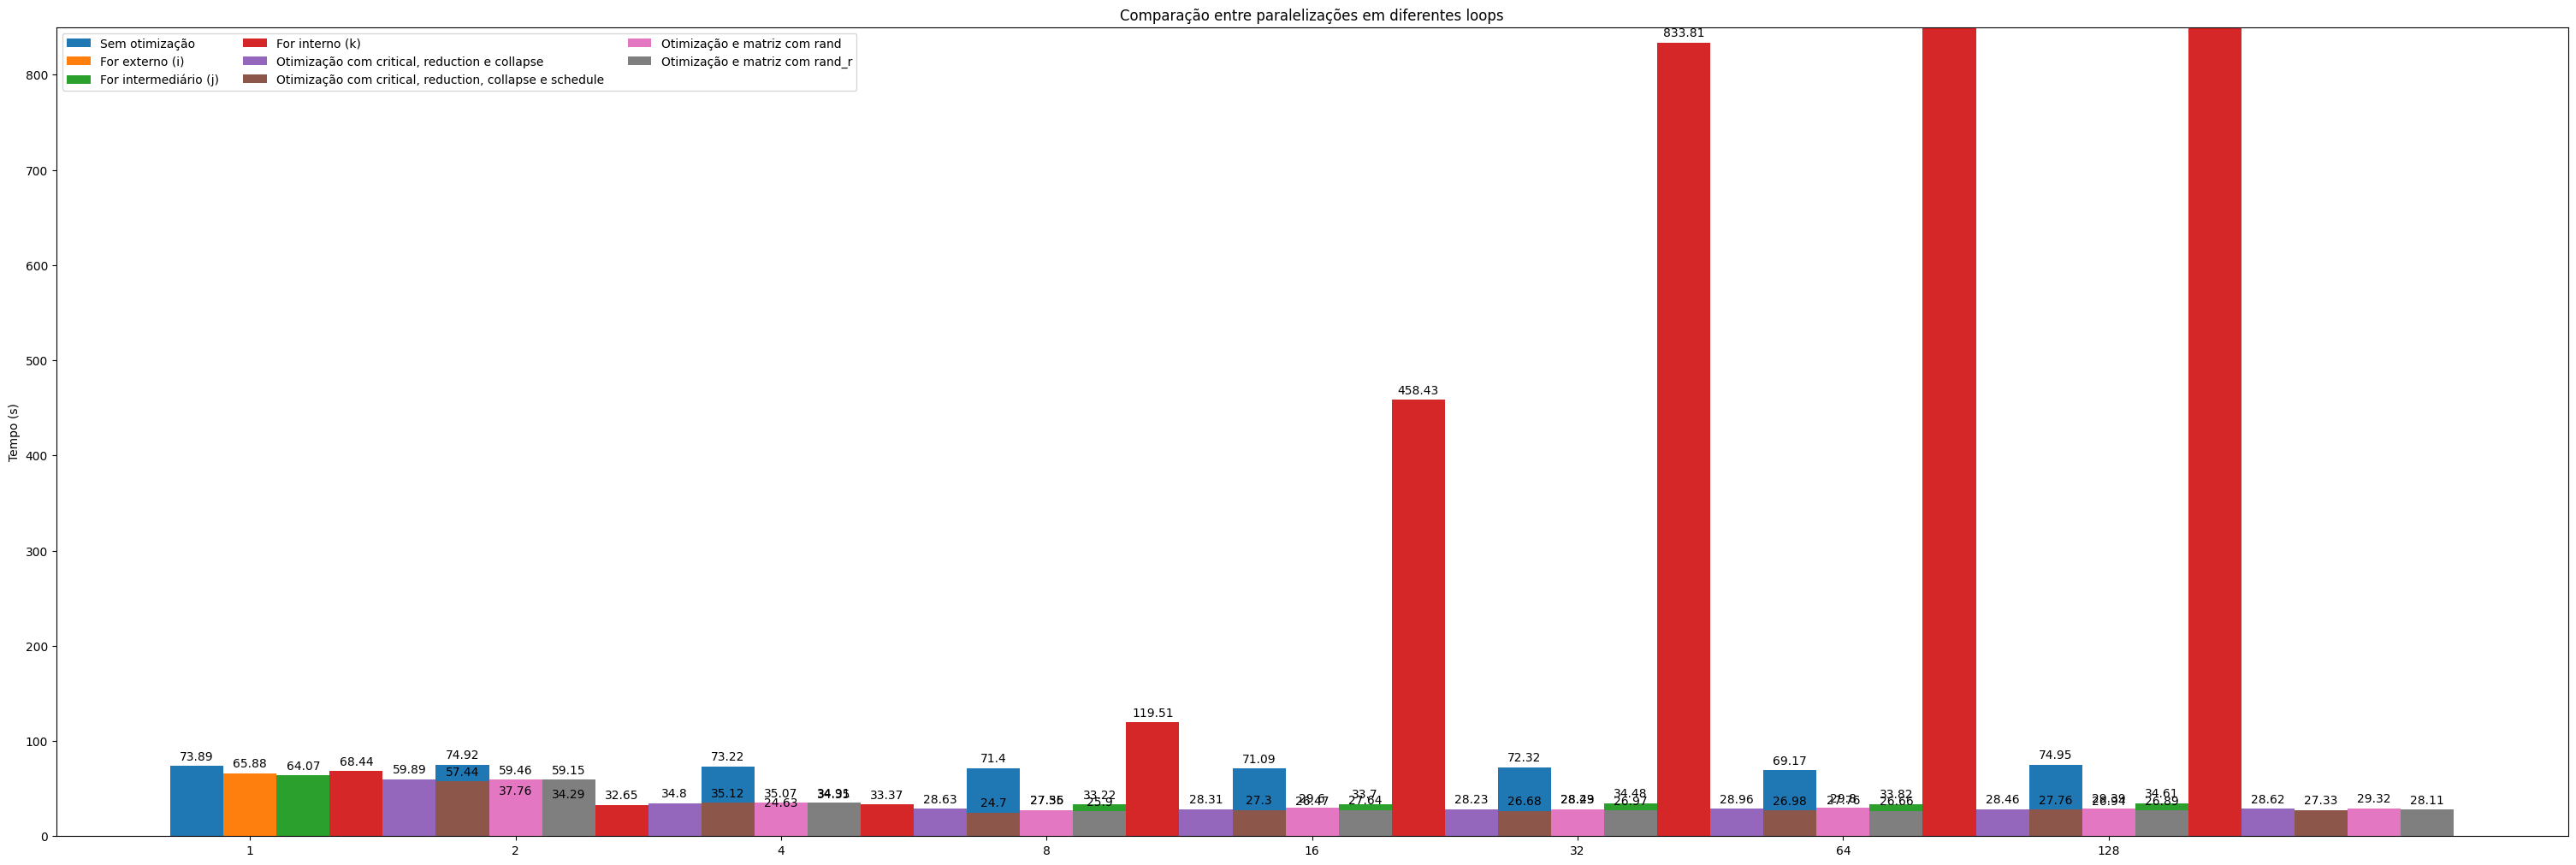

In [10]:
threads = ("1", "2", "4", "8", "16", "32", "64", "128")
tempos = {
    'Sem otimização': media_vec,
    'For externo (i)': media_vec_external,
    'For intermediário (j)': media_vec_meio,
    'For interno (k)': media_vec_internal,
    'Otimização com critical, reduction e collapse': media_vec_reduction,
    'Otimização com critical, reduction, collapse e schedule': media_vec_schedule,
    'Otimização e matriz com rand': media_vec_rand,
    'Otimização e matriz com rand_r': media_vec_rand_r,
}

x = np.arange(len(threads))  
width = 0.2  
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(30,10))

for attribute, measurement in tempos.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Tempo (s)')
ax.set_title('Comparação entre paralelizações em diferentes loops')
ax.set_xticks(x + width, threads)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 850)

plt.show()

#### Análise Gráfica Afunilada dos Algoritmos mais eficientes

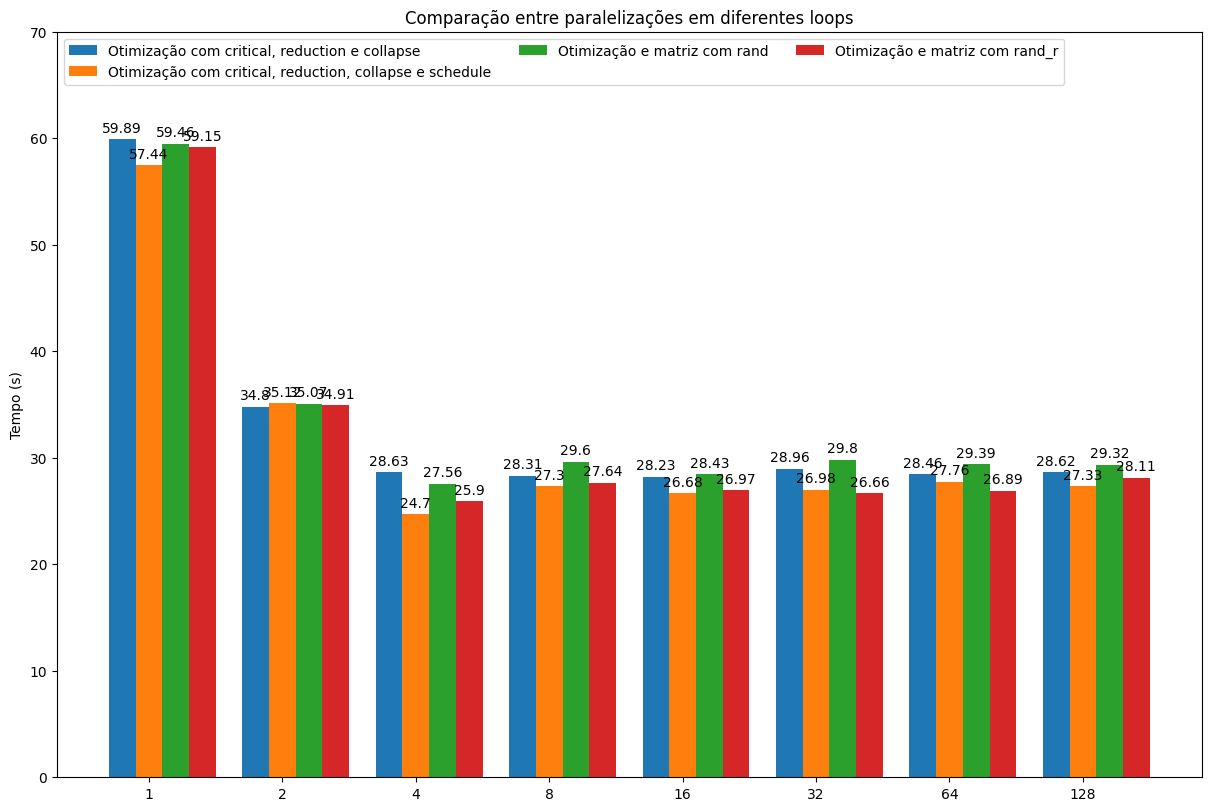

In [22]:
threads = ("1", "2", "4", "8", "16", "32", "64", "128")
tempos = {
    'Otimização com critical, reduction e collapse': media_vec_reduction,
    'Otimização com critical, reduction, collapse e schedule': media_vec_schedule,
    'Otimização e matriz com rand': media_vec_rand,
    'Otimização e matriz com rand_r': media_vec_rand_r,
}

x = np.arange(len(threads))  
width = 0.2  
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,8))

for attribute, measurement in tempos.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Tempo (s)')
ax.set_title('Comparação entre paralelizações em diferentes loops')
ax.set_xticks(x + width, threads)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 70)

plt.show()

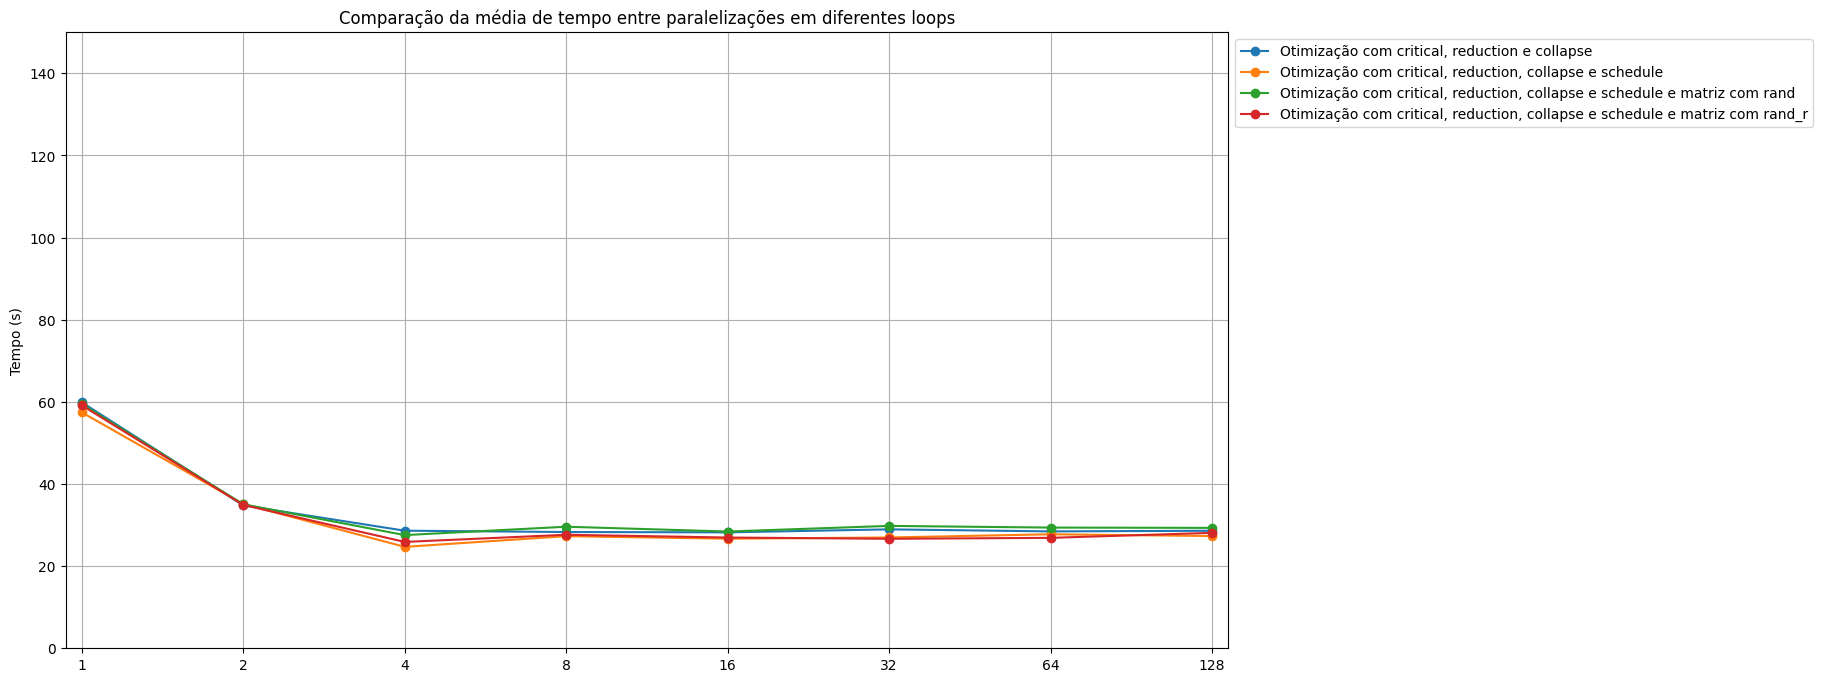

In [24]:
import numpy as np
import matplotlib.pyplot as plt


threads = ["1", "2", "4", "8", "16", "32", "64", "128"]
tempos = {
    'Otimização com critical, reduction e collapse': media_vec_reduction,
    'Otimização com critical, reduction, collapse e schedule': media_vec_schedule,
    'Otimização com critical, reduction, collapse e schedule e matriz com rand': media_vec_rand,
    'Otimização com critical, reduction, collapse e schedule e matriz com rand_r': media_vec_rand_r,
}

x = np.arange(len(threads))  
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8))

for attribute, measurement in tempos.items():
    ax.plot(x, measurement, marker='o', label=attribute)
    multiplier += 1

ax.set_ylabel('Tempo (s)')
ax.set_title('Comparação da média de tempo entre paralelizações em diferentes loops')
ax.set_xticks(x)
ax.set_xticklabels(threads)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


ax.set_xlim(x.min() - 0.1, x.max() + 0.1)  
ax.set_ylim(0, 150)  

plt.grid(True)
plt.show()


#### Gráfico para comparação de desvios padrão

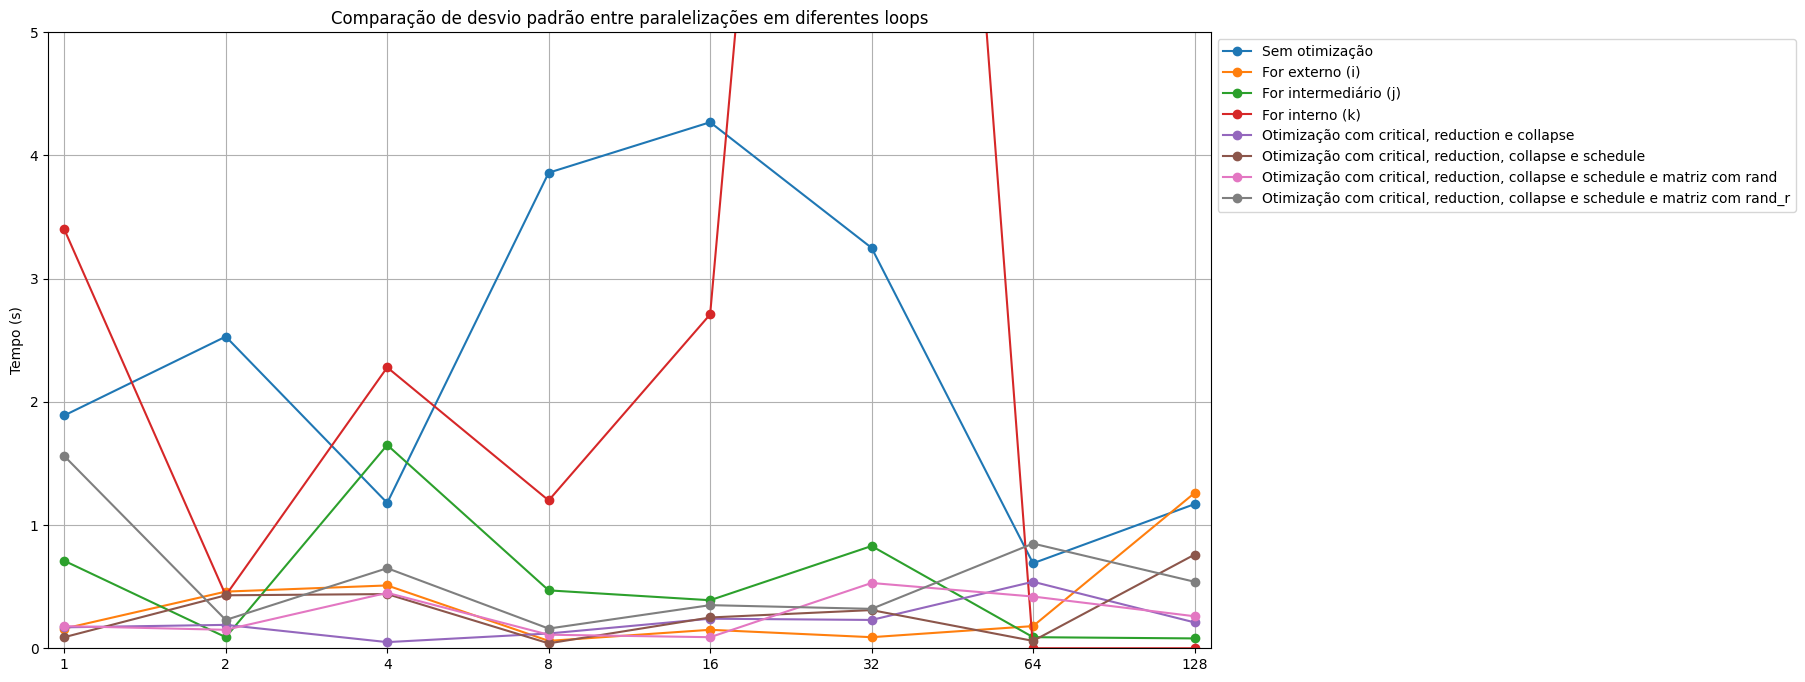

In [13]:
import numpy as np
import matplotlib.pyplot as plt


threads = ["1", "2", "4", "8", "16", "32", "64", "128"]
tempos = {
    'Sem otimização': desvio_vec,
    'For externo (i)': desvio_vec_external,
    'For intermediário (j)': desvio_vec_meio,
    'For interno (k)': desvio_vec_internal,
    'Otimização com critical, reduction e collapse': desvio_vec_reduction,
    'Otimização com critical, reduction, collapse e schedule': desvio_vec_schedule,
    'Otimização com critical, reduction, collapse e schedule e matriz com rand': desvio_vec_rand,
    'Otimização com critical, reduction, collapse e schedule e matriz com rand_r': desvio_vec_rand_r,
}

x = np.arange(len(threads))  
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8))

for attribute, measurement in tempos.items():
    ax.plot(x, measurement, marker='o', label=attribute)
    multiplier += 1


ax.set_ylabel('Tempo (s)')
ax.set_title('Comparação de desvio padrão entre paralelizações em diferentes loops')
ax.set_xticks(x)
ax.set_xticklabels(threads)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.set_xlim(x.min() - 0.1, x.max() + 0.1)  
ax.set_ylim(0, 5)  

plt.grid(True)
plt.show()
